In [4]:
import librosa as lr 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

#imports 
import librosa.display

In [5]:
ap='Marika Takeuchi - Melding.mp3'
y,sr=lr.load(ap)
time = np.arange(0,len(y))/sr
time

/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       2.93918095e+02, 2.93918141e+02, 2.93918186e+02])

6480897
22050


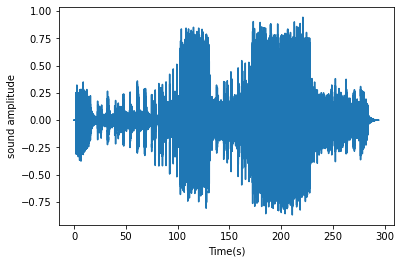

In [6]:
#can use array directly for classifying
#print(y)
print(len(y))
print(sr)

#plotting the audio
fig,ax=plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Pass y=[-6.5780814e-06 -1.6500799e-05 -7.4475533e-06 ...  1.8911238e-06
  2.1230057e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


[135.99917763]


/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if __name__ == "__main__":
/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Pass max_size=86 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  if sys.path[0] == "":


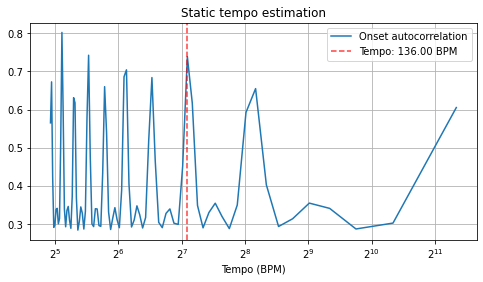

In [7]:
#The output of the beat tracker is an estimate of the tempo (in beats per minute), and an array of frame numbers corresponding to detected beat events.
from email.mime import base

#PLOTTING BEATS

onset_env = lr.onset.onset_strength(y, sr=sr)
tempo = lr.beat.tempo(onset_envelope=onset_env, sr=sr)
print(tempo)
tempo = np.asscalar(tempo)
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = lr.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = lr.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], lr.util.normalize(ac)[1:],label='Onset autocorrelation',base=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()

#tempo, beat_frames = lr.beat.beat_track(y=y, sr=sr)
#print(tempo)
#print(beat_frames)
#print(len(beat_frames))

In [8]:

#D = np.abs(lr.stft(y))**2
#S = lr.feature.melspectrogram(S=D)
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)

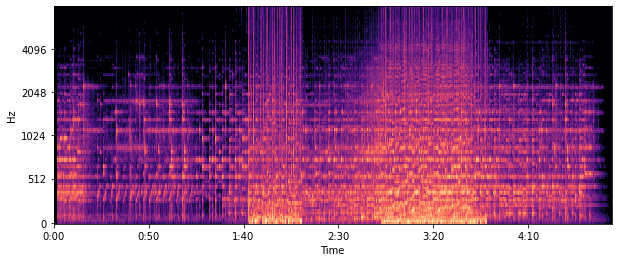

In [9]:
#spectogram for CNN
plt.figure(figsize=(10, 4))
lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


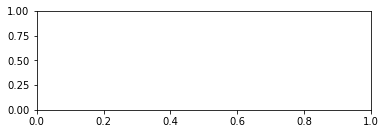

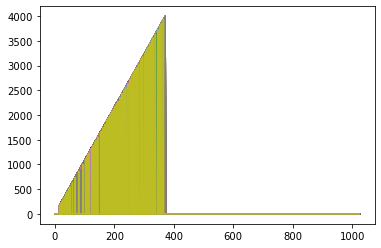

In [10]:
#plotting pitch
pitches, magnitudes = lr.piptrack(y=y, sr=sr)
print(pitches)
print('///')
print(magnitudes)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass rate=2.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


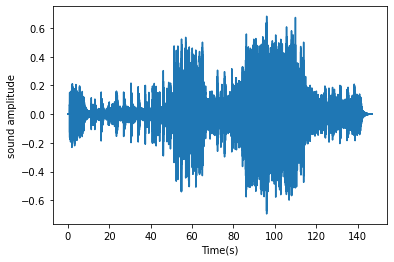

/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Pass rate=0.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  if __name__ == "__main__":


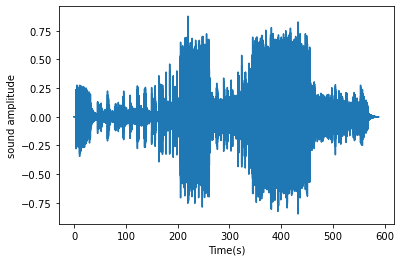

In [11]:
#audio time series streched by a rate
y_fast = lr.effects.time_stretch(y, 2.0)
time = np.arange(0,len(y_fast))/sr
fig, ax = plt.subplots()
ax.plot(time,y_fast)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()# compress to be twice as fast

y_slow = lr.effects.time_stretch(y, 0.5)
time = np.arange(0,len(y_slow))/sr
fig, ax = plt.subplots()
ax.plot(time,y_slow)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()# half the original speed

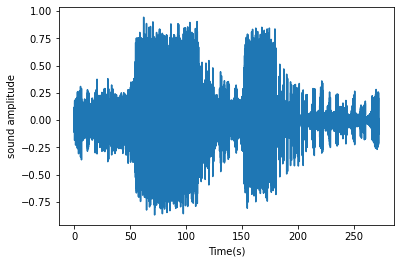

In [12]:
#remixing audio by re-ordering time intervals

_, beat_frames = lr.beat.beat_track(y=y, sr=sr,hop_length=512)
beat_samples = lr.frames_to_samples(beat_frames)
intervals = lr.util.frame(beat_samples, frame_length=2,hop_length=1).T
y_out = lr.effects.remix(y, intervals[::-1])
time = np.arange(0,len(y_out))/sr
fig, ax = plt.subplots()
ax.plot(time,y_out)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

(5, 384)


[[<matplotlib.axis.YTick at 0x7fda50e15c90>,
 [Text(0, 0, '1'),
  Text(0, 1, '2'),
  Text(0, 2, '3'),
  Text(0, 3, '4'),
  Text(0, 4, '5')],
 Text(0, 0.5, 'Harmonic'),
 Text(0.5, 0, 'Tempo (BPM)')]

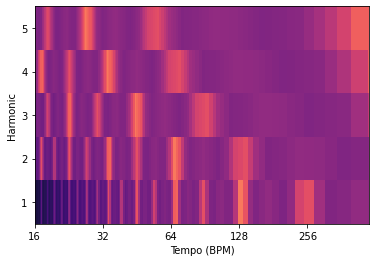

In [13]:
#harmonics
tempi = np.mean(librosa.feature.tempogram(y=y, sr=sr), axis=1)
# We'll measure the first five harmonics
harmonics = [1, 2, 3, 4, 5]
f_tempo = librosa.tempo_frequencies(len(tempi), sr=sr)
# Build the harmonic tensor; we only have one axis here (tempo)
t_harmonics = librosa.interp_harmonics(tempi, freqs=f_tempo, harmonics=harmonics, axis=0)
print(t_harmonics.shape)


fig, ax = plt.subplots()
librosa.display.specshow(t_harmonics, x_axis='tempo', sr=sr, ax=ax)
ax.set(yticks=np.arange(len(harmonics)),
       yticklabels=['{:.3g}'.format(_) for _ in harmonics],
       ylabel='Harmonic', xlabel='Tempo (BPM)')

(6, 1025, 12659)


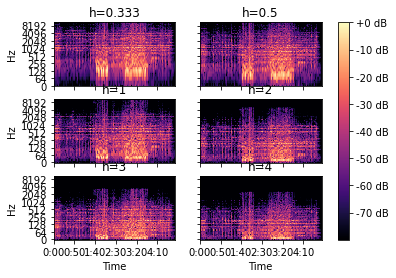

In [14]:
#sub harmonics
harmonics = [1./3, 1./2, 1, 2, 3, 4]
S = np.abs(librosa.stft(y))
fft_freqs = librosa.fft_frequencies(sr=sr)
S_harm = librosa.interp_harmonics(S, freqs=fft_freqs, harmonics=harmonics, axis=0)
print(S_harm.shape)

fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)
for i, _sh in enumerate(S_harm):
    img = librosa.display.specshow(librosa.amplitude_to_db(_sh,
                                                     ref=S.max()),
                             sr=sr, y_axis='log', x_axis='time',
                             ax=ax.flat[i])
    ax.flat[i].set(title='h={:.3g}'.format(harmonics[i]))
    ax.flat[i].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

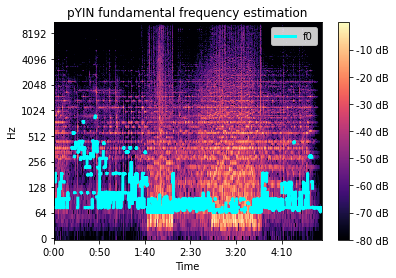

In [15]:
#fundamental frequency(pitch) estimation using probablistic YIN algorithm
f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

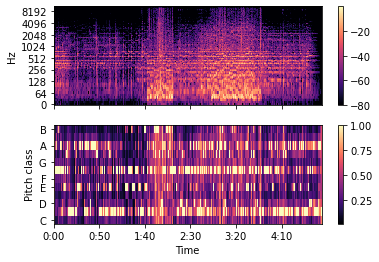

In [16]:
#chromagram
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

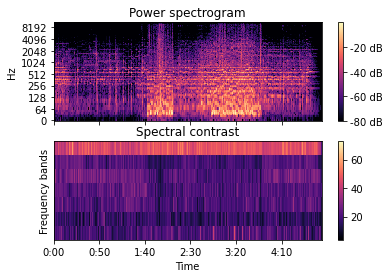

In [17]:
#spectral contrast
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

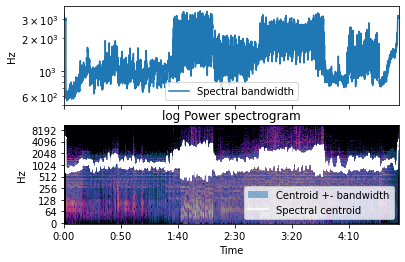

In [18]:
#spectral bandwidth
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

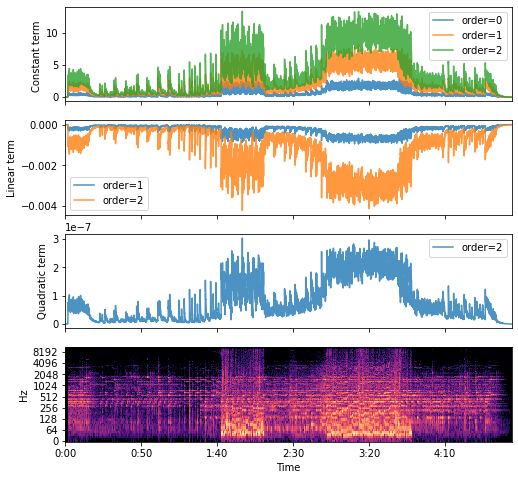

In [19]:
#poly features
S = np.abs(librosa.stft(y))
#degree 0
p0 = librosa.feature.poly_features(S=S, order=0)#degree 0
p1 = librosa.feature.poly_features(S=S, order=1)#linear
p2 = librosa.feature.poly_features(S=S, order=2)#quadratic
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

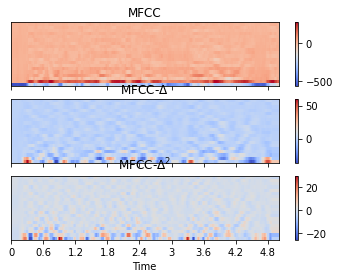

In [20]:
y, sr = librosa.load(librosa.ex('libri1'), duration=5)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)


fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img1 = librosa.display.specshow(mfcc, ax=ax[0], x_axis='time')
ax[0].set(title='MFCC')
ax[0].label_outer()
img2 = librosa.display.specshow(mfcc_delta, ax=ax[1], x_axis='time')
ax[1].set(title=r'MFCC-$\Delta$')
ax[1].label_outer()
img3 = librosa.display.specshow(mfcc_delta2, ax=ax[2], x_axis='time')
ax[2].set(title=r'MFCC-$\Delta^2$')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])
fig.colorbar(img3, ax=[ax[2]])

/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/home/ayushsingh/anaconda3/envs/ai_ml_nn/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


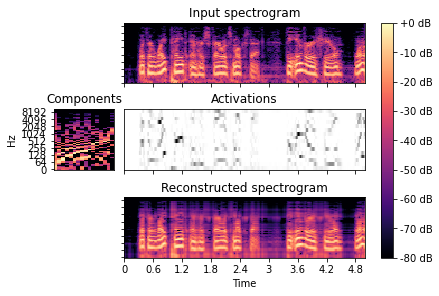

In [21]:
#spectrogram decompostition
S = np.abs(librosa.stft(y))
comps, acts = librosa.decompose.decompose(S, n_components=16,
                                          sort=True)

layout = [list(".AAAA"), list("BCCCC"), list(".DDDD")]
fig, ax = plt.subplot_mosaic(layout, constrained_layout=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax['A'])
ax['A'].set(title='Input spectrogram')
ax['A'].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(comps,
                                                 ref=np.max),
                         y_axis='log', ax=ax['B'])
ax['B'].set(title='Components')
ax['B'].label_outer()
ax['B'].sharey(ax['A'])
librosa.display.specshow(acts, x_axis='time', ax=ax['C'], cmap='gray_r')
ax['C'].set(ylabel='Components', title='Activations')
ax['C'].sharex(ax['A'])
ax['C'].label_outer()
S_approx = comps.dot(acts)
img = librosa.display.specshow(librosa.amplitude_to_db(S_approx,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax['D'])
ax['D'].set(title='Reconstructed spectrogram')
ax['D'].sharex(ax['A'])
ax['D'].sharey(ax['A'])
ax['D'].label_outer()
fig.colorbar(img, ax=list(ax.values()), format="%+2.f dB")